In [1]:
from ImageAlgoKD import *

## 1. Load Toy Data Points

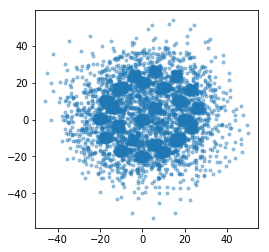

In [2]:
KERNEL_R = 1
basic = np.genfromtxt("../data/basic.csv",delimiter=',')
data = basic
for i in range(12):
    theta = 6.26*i/12
    data = np.r_[data,basic+20*np.array([np.cos(theta),np.sin(theta)])]
points = Points_KDBin(data,KERNEL_R)

# plot toy points
plt.figure(figsize=(4,4),facecolor="w")
plt.plot( points.cords[:,0],points.cords[:,1], ".",alpha=0.4 )

## 2. Define Clustering Parameters

In [3]:
# define clustering parameters
ia = ImageAlgoKD(MAXDISTANCE        = 20,
                 KERNEL_R           = KERNEL_R,
                 KERNEL_R_NORM      = 1.0,
                 KERNEL_R_POWER     = 0.0,
                 DECISION_RHO_KAPPA = 5.0,
                 DECISION_NHD       = 2.0,
                 CONTINUITY_NHD     = 2.0)

ia.setInputsPoints(points)
# run
ia.run("openclbin",1,blockSize=128)

clustering finished!
Run time with openclbin is 363.2144 ms, in which rho time is 23.6717 ms


23.671669012401253

## 3. Run and Plot Result

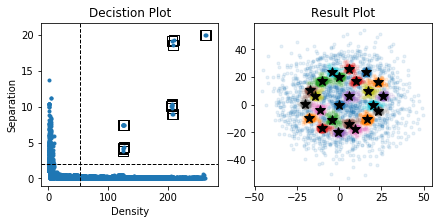

In [4]:
# plot result
plt.figure(figsize=(7,3),facecolor="w")

plt.subplot(1,2,1)
x,y,slt = ia.points.rho, ia.points.nhd, ia.points.isSeed
plt.plot(x,y, ".")
plt.scatter( x[slt], y[slt], marker="s", s=100, facecolors='none', edgecolors="k")

plt.axvline(ia.DECISION_RHO,color='k',linestyle="--",linewidth=1)
plt.axhline(ia.DECISION_NHD,color='k',linestyle="--",linewidth=1)
plt.xlabel("Density")
plt.ylabel("Separation")
plt.title("Decistion Plot")

plt.subplot(1,2,2)
for icluster in np.unique(ia.points.clusterID):
    sl = ia.points.clusterID==icluster
    x,y = ia.points.cords[sl,0],ia.points.cords[sl,1]
    plt.plot( x, y, ".",alpha=0.1)
x,y = ia.points.cords[slt,0],ia.points.cords[slt,1]
plt.plot( x, y, "k*", markersize=10)

plt.title("Result Plot")
plt.savefig("../plots/basic.png",dpi=300)

## 4. Check Opencl and Numpy Gives Consistent Result

In [5]:
ia.run("numpy")
id1 = ia.points.clusterID

ia.run("numpybin")
id2 = ia.points.clusterID

ia.run("opencl",1,blockSize=64)
id3 = ia.points.clusterID

ia.run("openclbin",1,blockSize=64)
id4 = ia.points.clusterID

identical = (id1==id2) & (id1==id3) & (id1==id4)
identical.all()

clustering finished!
Run time with numpy is 7930.9859 ms, in which rho time is 3541.9361 ms
clustering finished!
Run time with numpybin is 1893.6881 ms, in which rho time is 698.2239 ms
clustering finished!
Run time with opencl is 585.8371 ms, in which rho time is 356.5286 ms
clustering finished!
Run time with openclbin is 235.9444 ms, in which rho time is 12.2286 ms


True